#Confusion Matrix for a CNN

The goal for this notebook is to be able to make a confusion matrix about a neural network predicting MNIST.

https://stackoverflow.com/questions/53351963/mnist-get-confusion-matrix

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

import itertools

tf.random.set_seed(1)


Loading the Data

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Reshaping the data so it is easier to work with

In [4]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Now we can begin our function to build our CNN. We do this to be able to run the CNN multiple times with different parameters.

In [6]:
def build_model(conv_layers, pool_layers, epochs, X_train, y_train,k):
  cnn_model = build_cnn(conv_layers, pool_layers,k)
  
    

  # Define a loss function
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
  cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

  history = cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

  plot_history(history, epochs)

  confusionmatrix(model= cnn_model)

  return history

This builds the actual CNN.

In [13]:
def build_cnn(conv_layers, pool_layers, k):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(50, kernel_size=k,activation='relu',input_shape=(28,28,1),padding='same'))
    model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    model_cnn.add(Dropout(0.4))
    x=30
    for i in range(1, conv_layers):
        if i <= conv_layers-1:        
          model_cnn.add(Conv2D(x, kernel_size=k,activation='relu',padding='same'))
          model_cnn.add(MaxPooling2D((2, 2), padding='same'))
          model_cnn.add(Dropout(0.4))
          x=x/2
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128))
    model_cnn.add(Dense(50))
    model_cnn.add(Dense(10, activation='softmax'))

    print(model_cnn.summary())
    return model_cnn

This will plot our accuracy for analysis.

In [8]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

In [9]:
def confusionmatrix(model):

  confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))

  confusion_norm = confusion.astype('float') / confusion.sum(axis=0)[:, np.newaxis]

  classes=[0,1,2,3,4,5,6,7,8,9]

  plt.figure(figsize=(14,14))
  plt.imshow(confusion_norm, interpolation='nearest') 
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes)) 
  plt.xticks(tick_marks, classes, rotation=45) 
  plt.yticks(tick_marks, classes)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  fmt = '.3f'
  thresh = confusion_norm.max() / 2.
  for i, j in itertools.product(range(confusion_norm.shape[0]), range(confusion_norm.shape[1])):
    plt.text(j, i, format(confusion_norm[i, j], fmt), horizontalalignment="center",
    color="black" if confusion_norm[i, j] > thresh else "white")
  plt.tight_layout()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

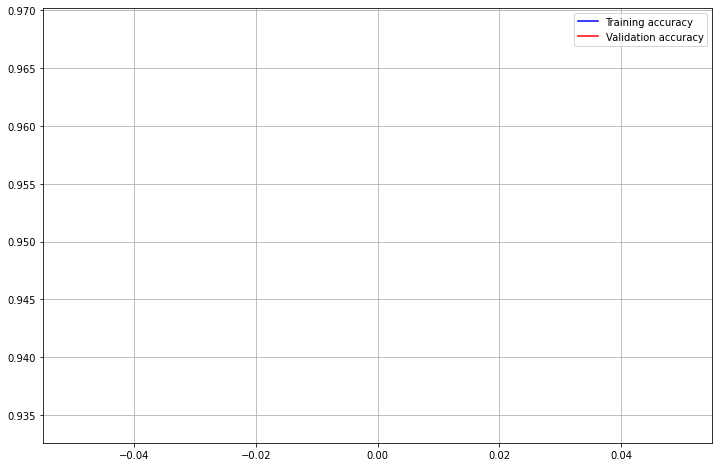

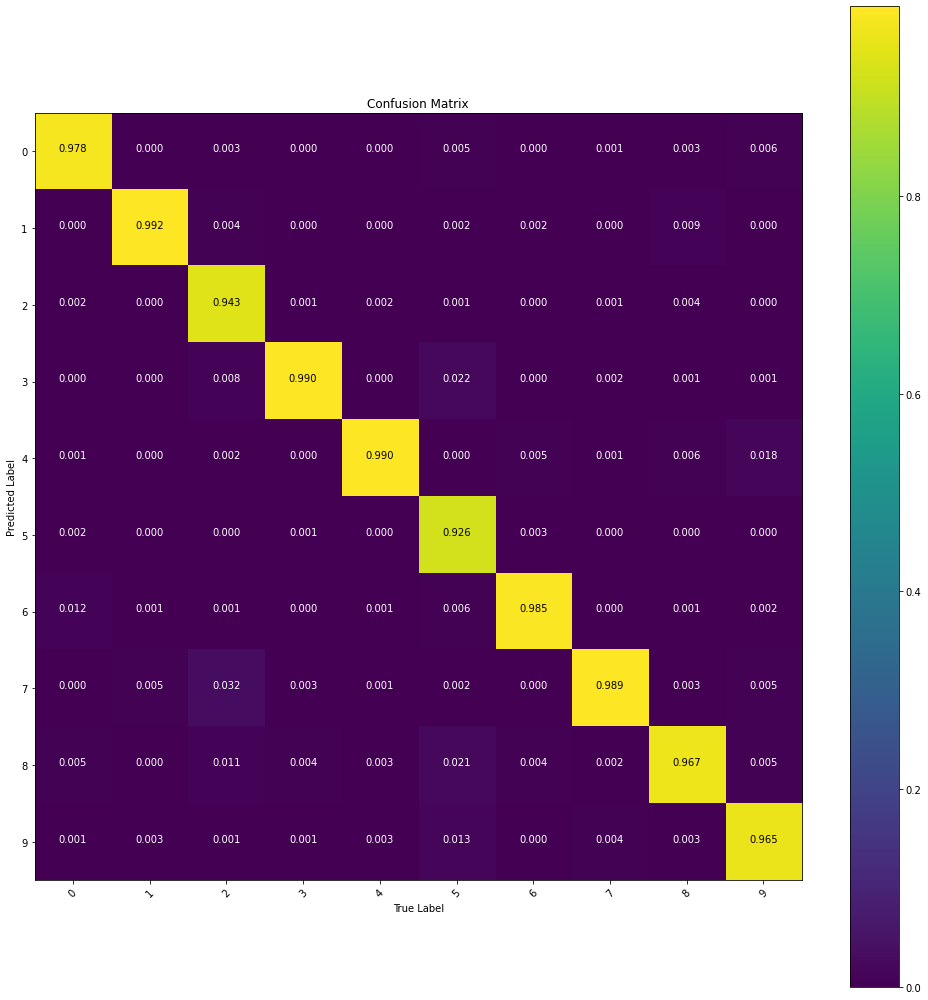

In [ ]:
build_model(conv_layers=2, pool_layers=2, epochs=1, X_train=X_train, y_train=y_train)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

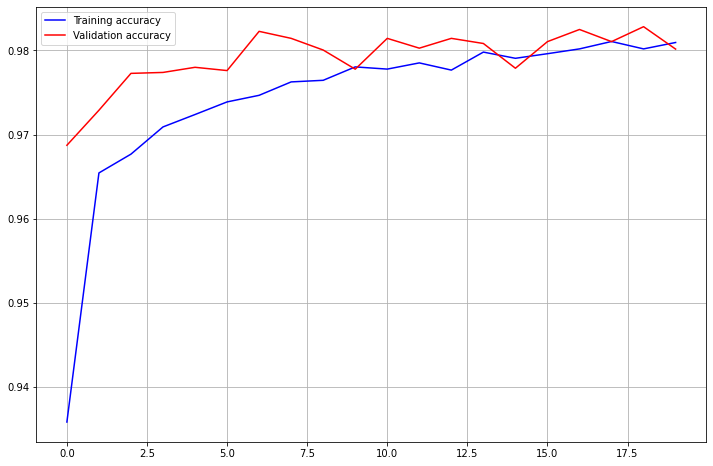

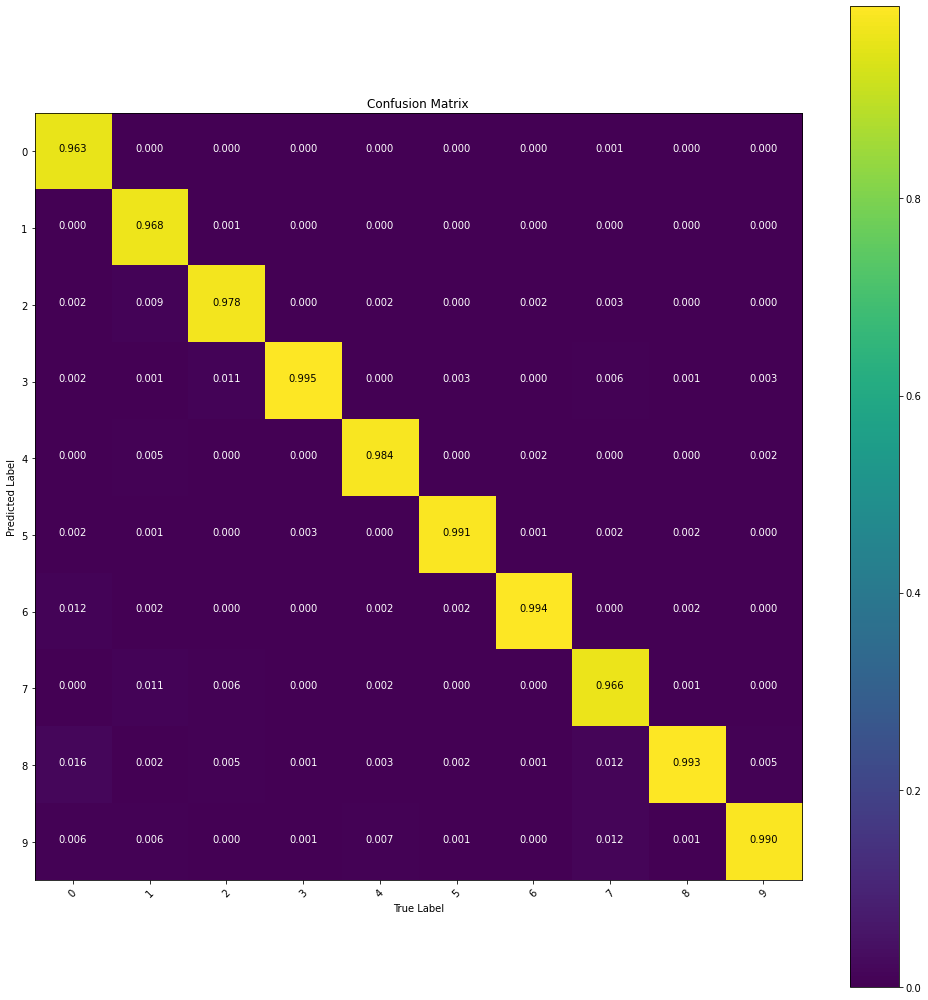

In [ ]:
build_model(conv_layers=2, pool_layers=2, epochs=20, X_train=X_train, y_train=y_train)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)             

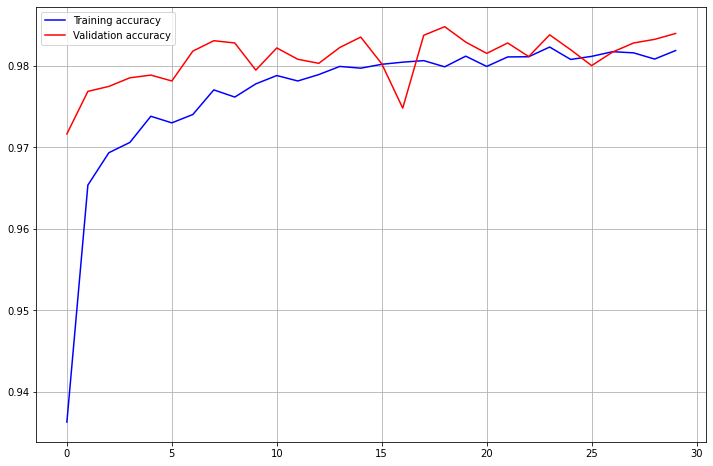

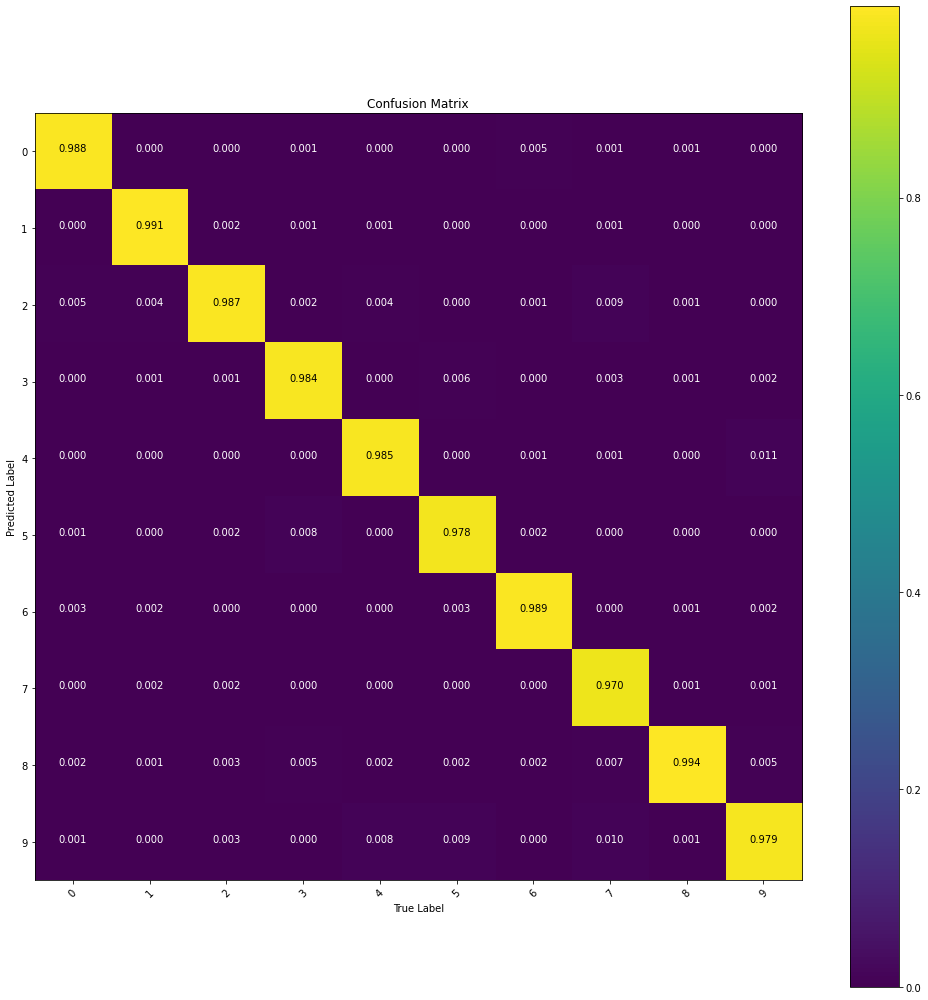

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 30)        300       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 15)        4065      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 15)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 735)              

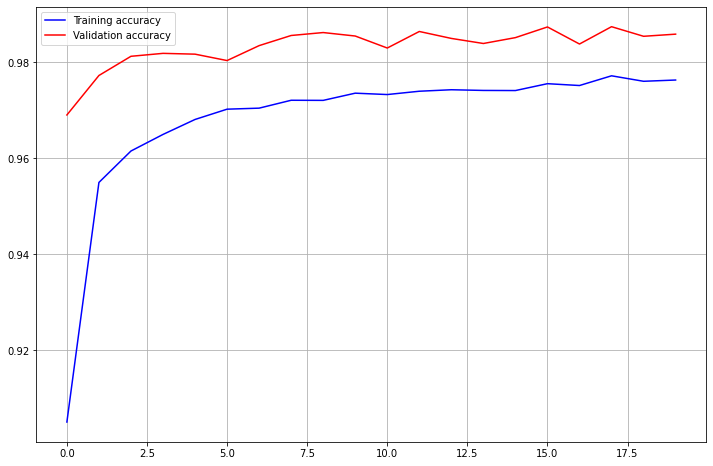

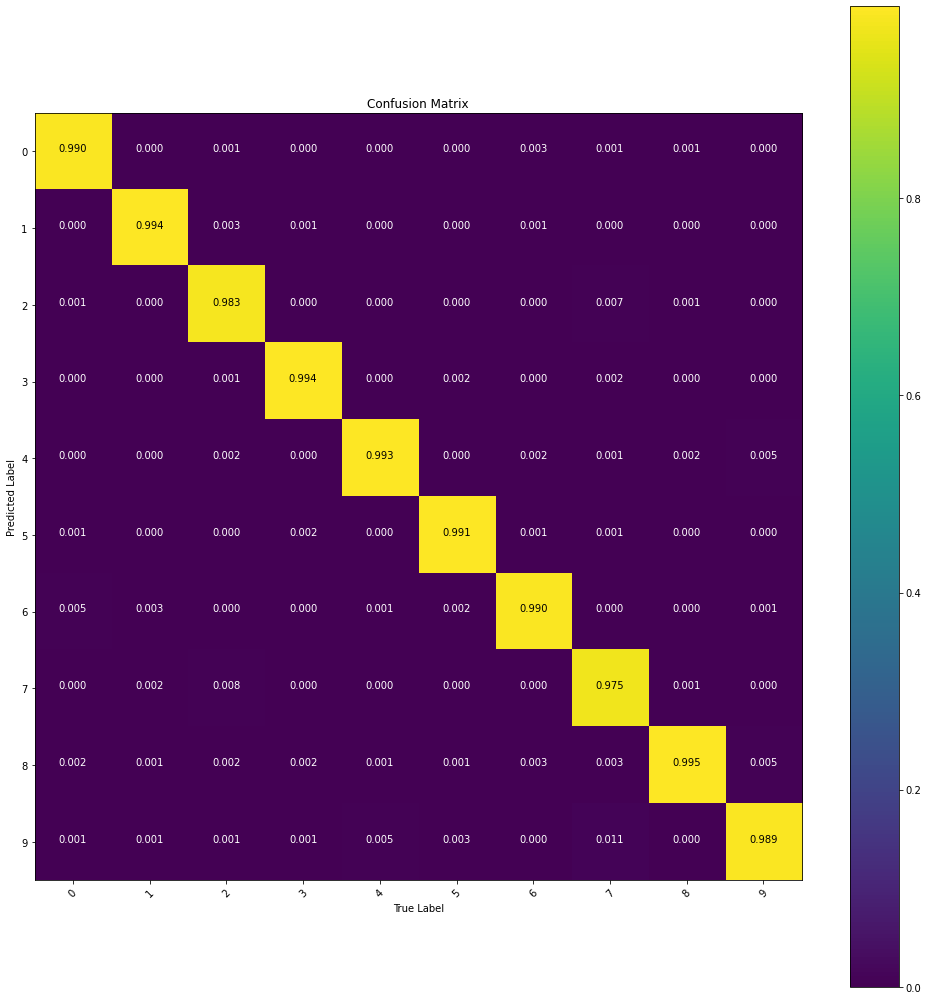

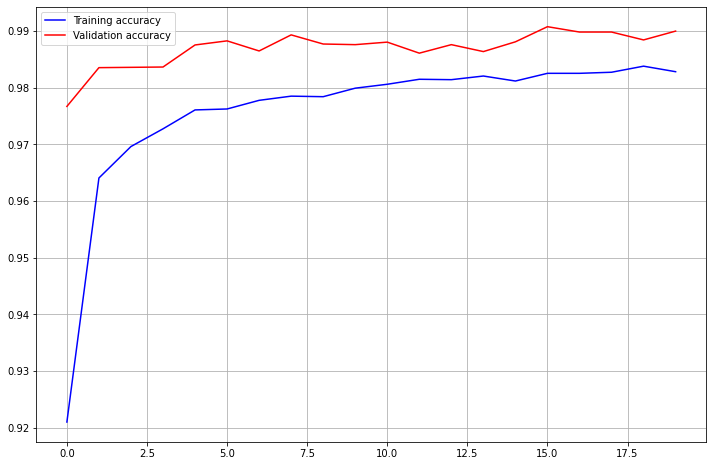

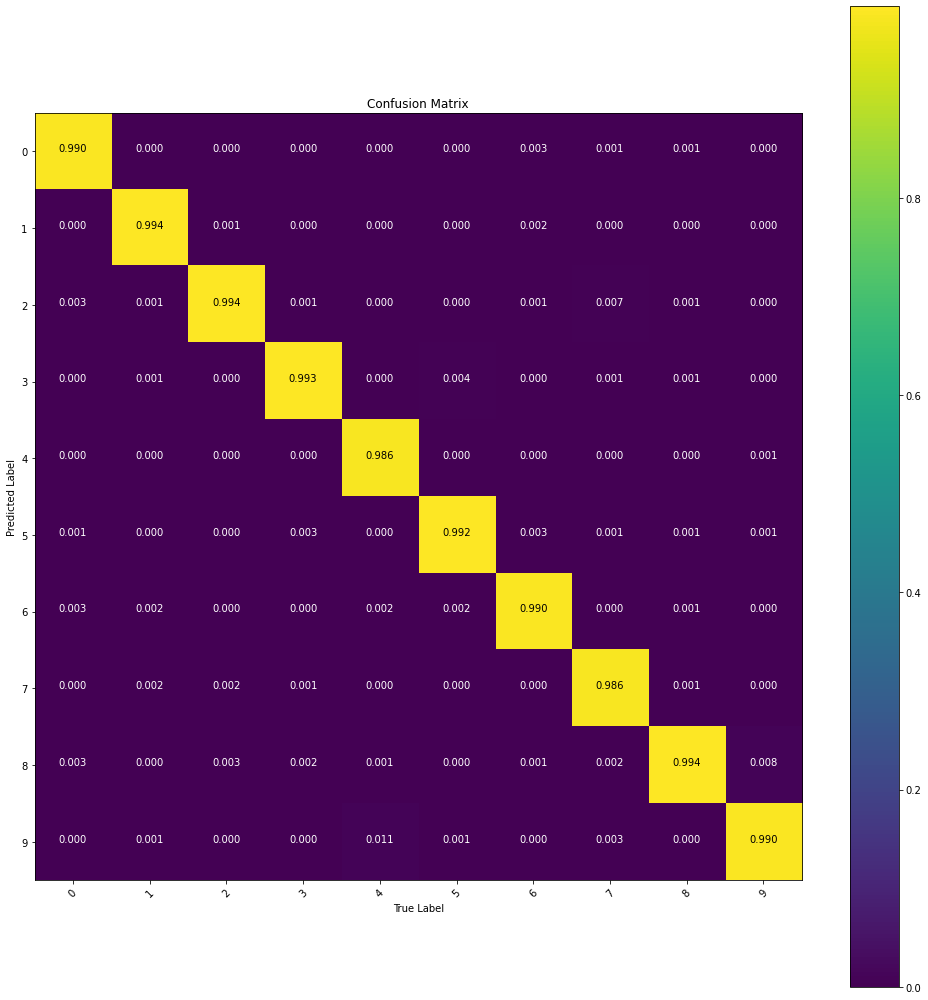

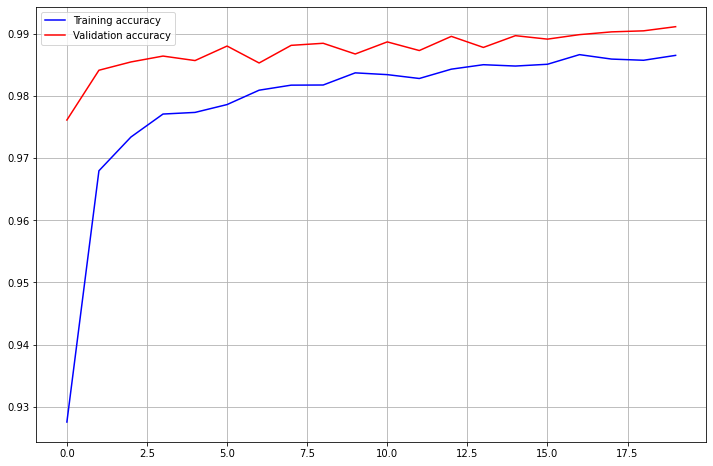

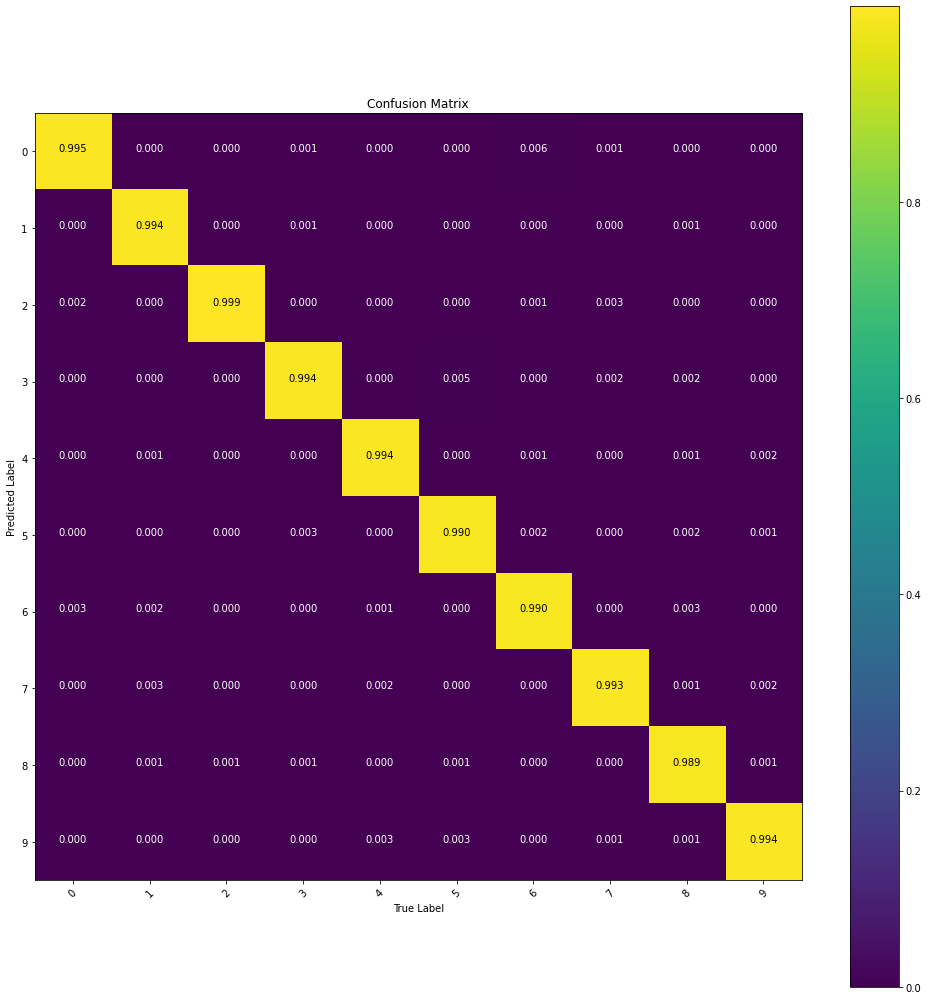

In [16]:
k=3
for i in range(0,3):
  build_model(conv_layers=2, pool_layers=2, epochs=20, X_train=X_train, y_train=y_train,k=k)
  k=k+2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 50)        2500      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 30)        73530     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 30)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 15)         

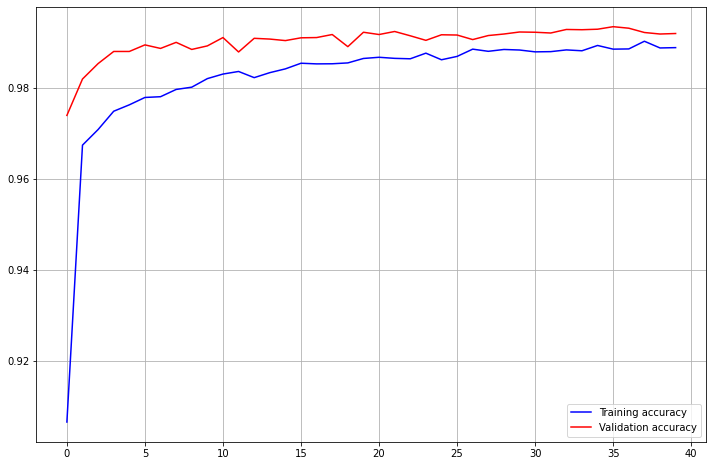

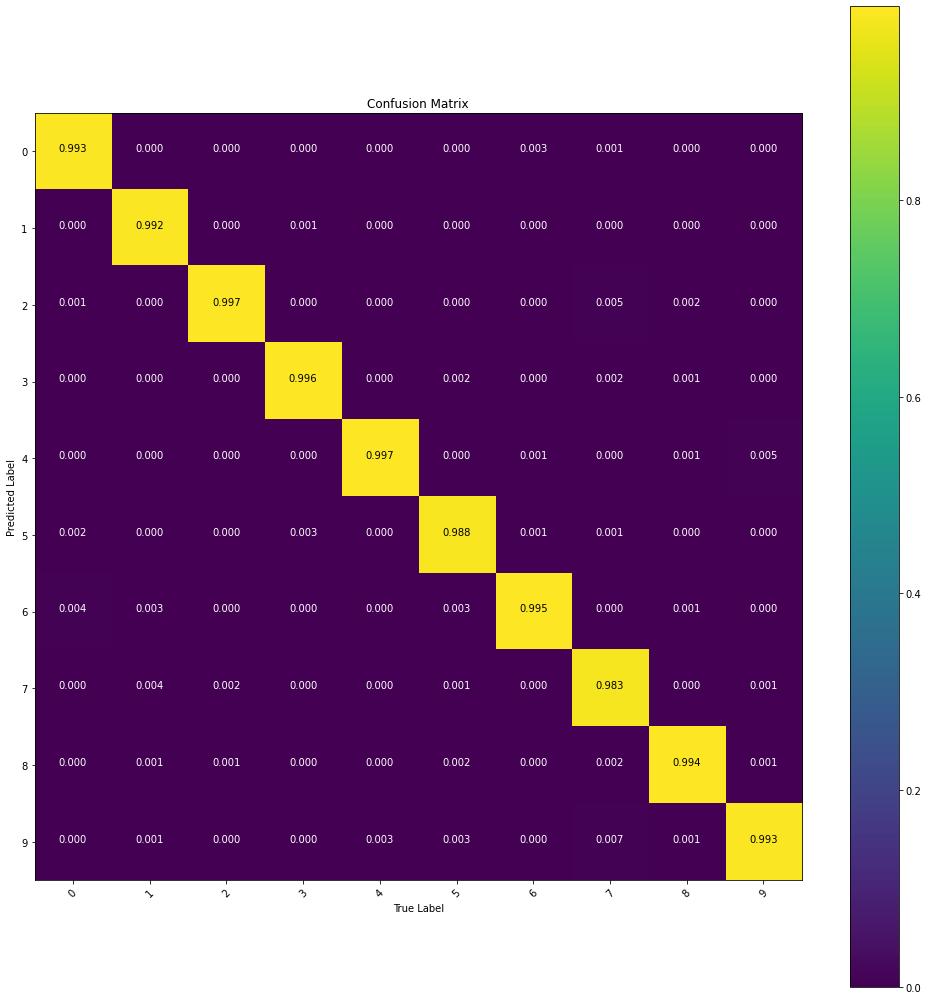

In [14]:
build_model(conv_layers=3, pool_layers=3, epochs=40, X_train=X_train, y_train=y_train, k=7)